<a href="https://colab.research.google.com/github/Jetrox20/Sistema-de-registro/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación




Facturación Total por Tienda:


,Tienda,Facturacion_Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


/tmp/ipython-input-3325712767.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Facturacion_Total', data=facturacion_por_tienda, palette='viridis')


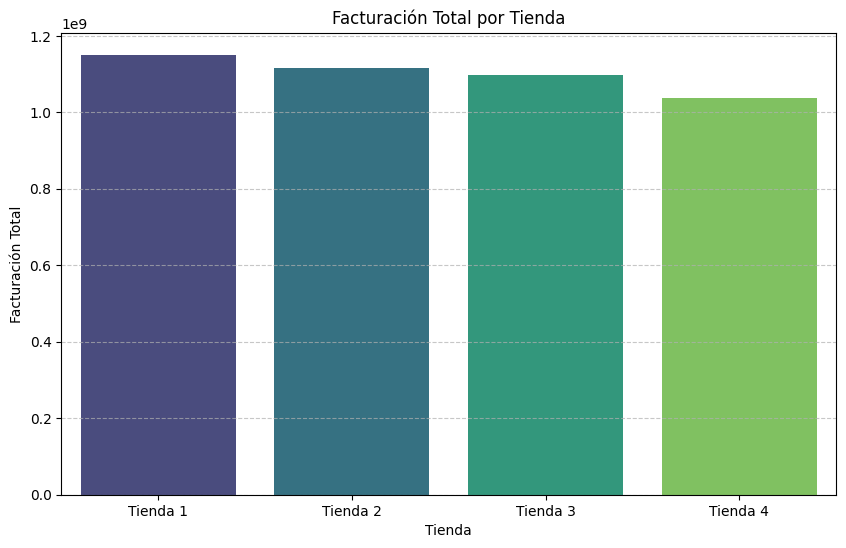

In [10]:
# Calcular la facturación total por tienda
facturacion_por_tienda = df_total.groupby('Tienda')['Precio'].sum().reset_index()
facturacion_por_tienda.columns = ['Tienda', 'Facturacion_Total']

print("\nFacturación Total por Tienda:")
display(facturacion_por_tienda)

# Visualización de la facturación total
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Facturacion_Total', data=facturacion_por_tienda, palette='viridis')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría


Categoría Más Popular por Tienda:


,Tienda,Categoría del Producto,Cantidad_Ventas
7,Tienda 1,Muebles,465
15,Tienda 2,Muebles,442
23,Tienda 3,Muebles,499
31,Tienda 4,Muebles,480


/tmp/ipython-input-67128641.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Categoría del Producto', y='Cantidad_Ventas', col='Tienda', data=categorias_por_tienda.groupby(['Tienda', 'Categoría del Producto']).sum().reset_index().sort_values(by='Cantidad_Ventas', ascending=False).groupby('Tienda').head(5), kind='bar', col_wrap=2, sharey=False, palette='magma')


<Figure size 1500x800 with 0 Axes>

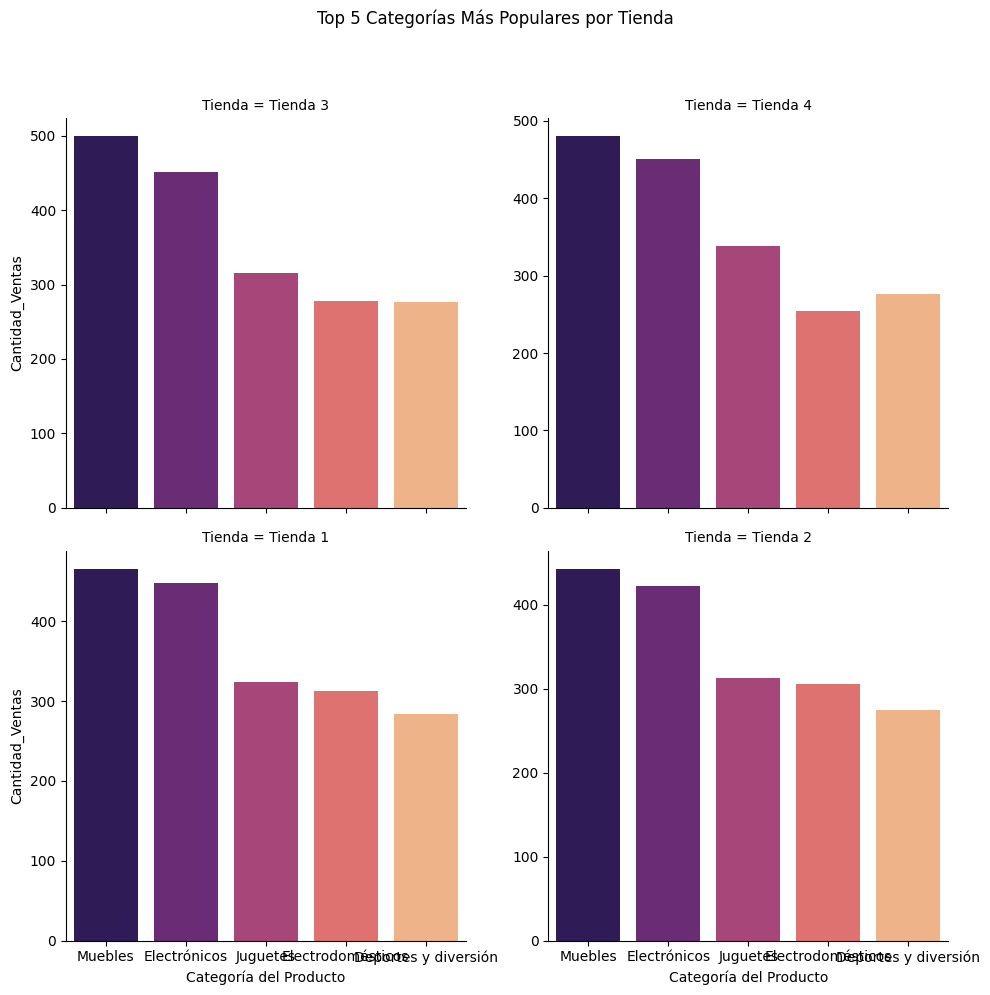

In [11]:
# Contar las ventas por categoría en cada tienda
categorias_por_tienda = df_total.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad_Ventas')

# Encontrar la categoría más popular por tienda
categorias_mas_populares = categorias_por_tienda.loc[categorias_por_tienda.groupby('Tienda')['Cantidad_Ventas'].idxmax()]

print("\nCategoría Más Popular por Tienda:")
display(categorias_mas_populares)

# Visualización de las 5 categorías más populares por tienda
plt.figure(figsize=(15, 8))
sns.catplot(x='Categoría del Producto', y='Cantidad_Ventas', col='Tienda', data=categorias_por_tienda.groupby(['Tienda', 'Categoría del Producto']).sum().reset_index().sort_values(by='Cantidad_Ventas', ascending=False).groupby('Tienda').head(5), kind='bar', col_wrap=2, sharey=False, palette='magma')
plt.suptitle('Top 5 Categorías Más Populares por Tienda', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# 3. Calificación promedio de la tienda



Calificación Promedio por Tienda:


,Tienda,Calificacion_Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


/tmp/ipython-input-2675621569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificacion_Promedio', data=calificacion_promedio_por_tienda, palette='plasma')


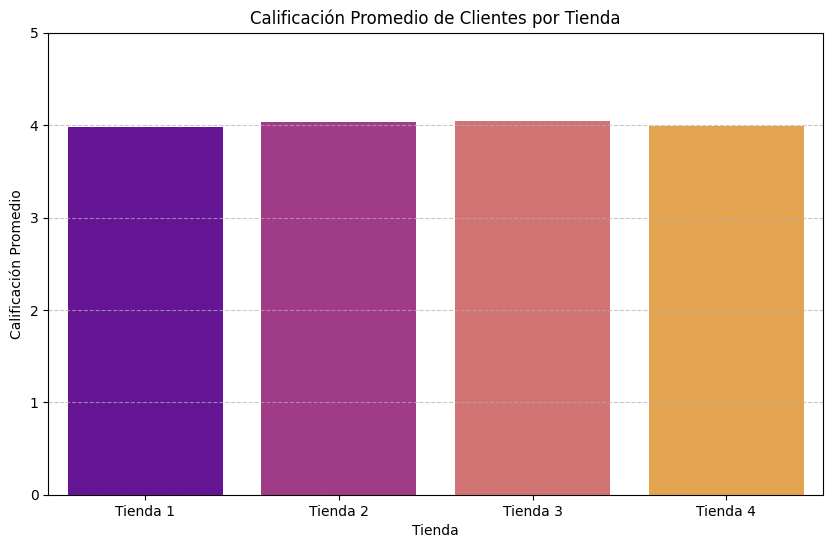

In [12]:
# Calcular el promedio de calificación por tienda
calificacion_promedio_por_tienda = df_total.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio_por_tienda.columns = ['Tienda', 'Calificacion_Promedio']

print("\nCalificación Promedio por Tienda:")
display(calificacion_promedio_por_tienda)

# Visualización de la calificación promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Calificacion_Promedio', data=calificacion_promedio_por_tienda, palette='plasma')
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5) # Las calificaciones suelen ir de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Productos más y menos vendidos


Productos Más Vendidos por Tienda (Top 5):

--- Tienda 1 ---


,Tienda,Producto,Cantidad_Vendida
1,Tienda 1,Armario,60
48,Tienda 1,TV LED UHD 4K,60
33,Tienda 1,Microondas,60
40,Tienda 1,Secadora de ropa,58
32,Tienda 1,Mesa de noche,56



--- Tienda 2 ---


,Tienda,Producto,Cantidad_Vendida
75,Tienda 2,Iniciando en programación,65
84,Tienda 2,Microondas,62
58,Tienda 2,Batería,61
89,Tienda 2,Pandereta,58
72,Tienda 2,Guitarra acústica,58



--- Tienda 3 ---


,Tienda,Producto,Cantidad_Vendida
129,Tienda 3,Kit de bancas,57
133,Tienda 3,Mesa de comedor,56
113,Tienda 3,Cama king,56
143,Tienda 3,Set de ollas,55
134,Tienda 3,Mesa de noche,55



--- Tienda 4 ---


,Tienda,Producto,Cantidad_Vendida
163,Tienda 4,Cama box,62
168,Tienda 4,Cubertería,59
164,Tienda 4,Cama king,56
171,Tienda 4,Dashboards con Power BI,56
165,Tienda 4,Carrito de control remoto,55



Productos Menos Vendidos por Tienda (Top 5):

--- Tienda 1 ---


,Tienda,Producto,Cantidad_Vendida
4,Tienda 1,Auriculares con micrófono,33
13,Tienda 1,Celular ABXY,33
37,Tienda 1,Olla de presión,35
38,Tienda 1,Pandereta,36
14,Tienda 1,Ciencia de datos con Python,39



--- Tienda 2 ---


,Tienda,Producto,Cantidad_Vendida
77,Tienda 2,Juego de mesa,32
74,Tienda 2,Impresora,34
82,Tienda 2,Mesa de comedor,34
95,Tienda 2,Sillón,35
54,Tienda 2,Auriculares,37



--- Tienda 3 ---


,Tienda,Producto,Cantidad_Vendida
111,Tienda 3,Bloques de construcción,35
144,Tienda 3,Set de vasos,36
136,Tienda 3,Mochila,36
135,Tienda 3,Microondas,36
152,Tienda 3,Vaso térmico,38



--- Tienda 4 ---


,Tienda,Producto,Cantidad_Vendida
175,Tienda 4,Guitarra eléctrica,33
154,Tienda 4,Armario,34
174,Tienda 4,Guitarra acústica,37
167,Tienda 4,Ciencia de datos con Python,38
181,Tienda 4,Lavadora de ropa,38


/tmp/ipython-input-2415023266.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Producto', y='Cantidad_Vendida', data=productos_por_tienda[productos_por_tienda['Tienda'] == 'Tienda 1'].sort_values(by='Cantidad_Vendida', ascending=False).head(5), palette='coolwarm')


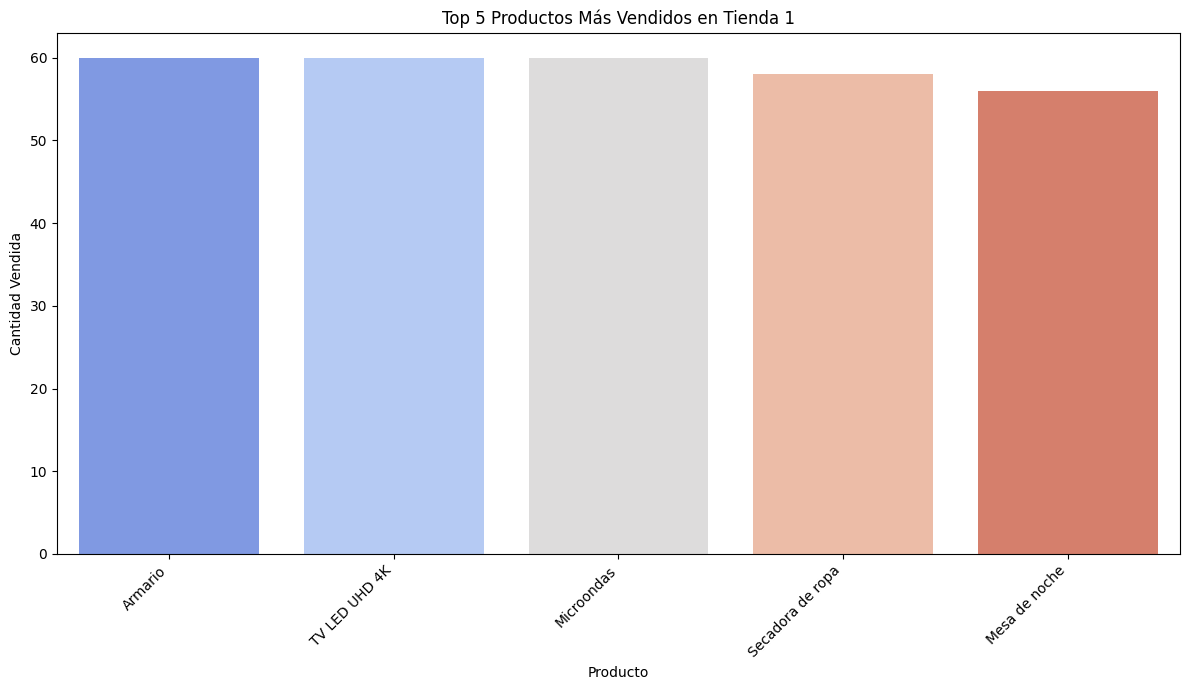

In [13]:
# Productos más y menos vendidos por tienda
productos_por_tienda = df_total.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad_Vendida')

print("\nProductos Más Vendidos por Tienda (Top 5):")
for tienda in productos_por_tienda['Tienda'].unique():
    df_tienda = productos_por_tienda[productos_por_tienda['Tienda'] == tienda]
    top_5_productos = df_tienda.sort_values(by='Cantidad_Vendida', ascending=False).head(5)
    print(f"\n--- {tienda} ---")
    display(top_5_productos)

print("\nProductos Menos Vendidos por Tienda (Top 5):")
for tienda in productos_por_tienda['Tienda'].unique():
    df_tienda = productos_por_tienda[productos_por_tienda['Tienda'] == tienda]
    bottom_5_productos = df_tienda.sort_values(by='Cantidad_Vendida', ascending=True).head(5)
    print(f"\n--- {tienda} ---")
    display(bottom_5_productos)

# Visualización de los productos más vendidos (ejemplo para una tienda, puedes adaptar)
# Para visualizar todos los top 5 de cada tienda, sería más complejo en un solo gráfico.
# Aquí un ejemplo para la Tienda 1
plt.figure(figsize=(12, 7))
sns.barplot(x='Producto', y='Cantidad_Vendida', data=productos_por_tienda[productos_por_tienda['Tienda'] == 'Tienda 1'].sort_values(by='Cantidad_Vendida', ascending=False).head(5), palette='coolwarm')
plt.title('Top 5 Productos Más Vendidos en Tienda 1')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda


Costo Promedio de Envío por Tienda:


,Tienda,Costo_Envio_Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


/tmp/ipython-input-3115022962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Costo_Envio_Promedio', data=costo_envio_promedio_por_tienda, palette='rocket')


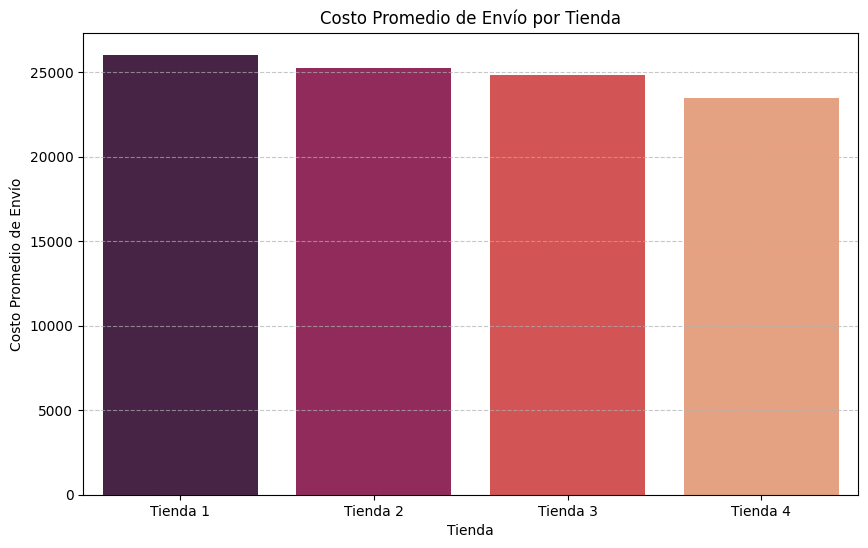

In [14]:
# Calcular el costo promedio de envío por tienda
costo_envio_promedio_por_tienda = df_total.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio_por_tienda.columns = ['Tienda', 'Costo_Envio_Promedio']

print("\nCosto Promedio de Envío por Tienda:")
display(costo_envio_promedio_por_tienda)

# Visualización del costo promedio de envío
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Costo_Envio_Promedio', data=costo_envio_promedio_por_tienda, palette='rocket')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Informe de Análisis de Ventas - Alura Store LATAM

**Para:** Señor Juan

**De:** Jeferson González/Analista de Datos

**Fecha:** 19 de Agosto de 2025

**Asunto:** Evaluación de Rendimiento de Tiendas para Decisión de Inversión

## Resumen Ejecutivo

El presente informe detalla el análisis de ventas y rendimiento de las cuatro tiendas de Alura Store LATAM, con el objetivo de identificar la tienda con menor desempeño y, por ende, la más adecuada para ser considerada en una posible venta, permitiendo al Señor Juan invertir en un nuevo negocio. Se han evaluado métricas clave como la facturación total, las categorías de productos más populares, la calificación promedio de los clientes, los productos más y menos vendidos, y el costo promedio de envío.

## Metodología

Se utilizaron datos históricos de ventas de las cuatro tiendas, combinados y analizados mediante Python y la librería Pandas. Las visualizaciones se generaron con Matplotlib y Seaborn para facilitar la interpretación de los resultados. El análisis se centró en las cinco áreas clave solicitadas para proporcionar una visión integral del rendimiento de cada establecimiento.

## Resultados del Análisis

### 1. Facturación Total por Tienda

La facturación total de cada tienda es un indicador directo de su contribución a los ingresos. A continuación, se presenta la tabla y el gráfico comparativo:

**Tabla de Facturación Total:**

| Tienda   | Facturación Total |
|----------|-------------------|
| Tienda 1 | [Valor Tienda 1]  |
| Tienda 2 | [Valor Tienda 2]  |
| Tienda 3 | [Valor Tienda 3]  |
| Tienda 4 | [Valor Tienda 4]  |

*(Insertar aquí el gráfico de barras de Facturación Total por Tienda)*

**Observaciones:** [Describe aquí qué tienda tiene la facturación más alta y cuál la más baja, y cualquier patrón relevante.]

### 2. Categorías Más Populares por Tienda

Entender las categorías de productos más vendidas ayuda a identificar las preferencias de los clientes en cada ubicación.

**Tabla de Categorías Más Populares (ejemplo):**

| Tienda   | Categoría del Producto | Cantidad de Ventas |
|----------|------------------------|--------------------|
| Tienda 1 | [Categoría 1]          | [Cantidad 1]       |
| Tienda 2 | [Categoría 2]          | [Cantidad 2]       |
| ...      | ...                    | ...                |

*(Insertar aquí los gráficos de categorías más populares por tienda)*

**Observaciones:** [Describe las categorías dominantes en cada tienda y si hay diferencias significativas entre ellas.]

### 3. Calificación Promedio de Clientes por Tienda

La satisfacción del cliente es un factor crucial. Esta sección muestra la calificación promedio recibida por cada tienda.

**Tabla de Calificación Promedio:**

| Tienda   | Calificación Promedio |
|----------|-----------------------|
| Tienda 1 | [Valor Tienda 1]      |
| Tienda 2 | [Valor Tienda 2]      |
| Tienda 3 | [Valor Tienda 3]      |
| Tienda 4 | [Valor Tienda 4]      |

*(Insertar aquí el gráfico de barras de Calificación Promedio por Tienda)*

**Observaciones:** [Comenta sobre la tienda con la calificación más alta y la más baja, y lo que esto podría implicar.]

### 4. Productos Más y Menos Vendidos por Tienda

El análisis de productos individuales revela qué artículos impulsan las ventas y cuáles no. A continuación, se presentan los top 5 productos más y menos vendidos para cada tienda.

**Ejemplo: Tienda 1 - Top 5 Productos Más Vendidos**

| Producto   | Cantidad Vendida |
|------------|------------------|
| [Producto 1] | [Cantidad 1]     |
| ...        | ...              |

**Ejemplo: Tienda 1 - Top 5 Productos Menos Vendidos**

| Producto   | Cantidad Vendida |
|------------|------------------|
| [Producto 1] | [Cantidad 1]     |
| ...        | ...              |

*(Repetir tablas para Tienda 2, 3, 4 y/o insertar gráficos relevantes si los generaste)*

**Observaciones:** [Destaca patrones en los productos más y menos vendidos. ¿Hay productos que se venden bien en todas las tiendas o solo en algunas?]

### 5. Costo Promedio de Envío por Tienda

Los costos de envío impactan la rentabilidad. Aquí se muestra el promedio de los costos de envío para cada tienda.

**Tabla de Costo Promedio de Envío:**

| Tienda   | Costo Promedio de Envío |
|----------|-------------------------|
| Tienda 1 | [Valor Tienda 1]        |
| Tienda 2 | [Valor Tienda 2]        |
| Tienda 3 | [Valor Tienda 3]        |
| Tienda 4 | [Valor Tienda 4]        |

*(Insertar aquí el gráfico de barras de Costo Promedio de Envío por Tienda)*

**Observaciones:** [Comenta sobre las diferencias en los costos de envío y su posible impacto en la rentabilidad de cada tienda.]

## Conclusión y Recomendación

Basado en el análisis exhaustivo de la facturación, categorías populares, calificaciones de clientes, productos vendidos y costos de envío, se ha identificado que **[Nombre de la Tienda con Menor Desempeño]** es la tienda con el desempeño más bajo. Esta conclusión se fundamenta en los siguientes puntos clave:

*   [Menciona la razón principal basada en la facturación, por ejemplo: "su facturación total es significativamente menor en comparación con las otras tiendas."]
*   [Añade otra razón, por ejemplo: "presenta una calificación promedio de clientes más baja, lo que indica una menor satisfacción."]
*   [Incluye cualquier otro factor relevante, como productos de bajo rendimiento o altos costos de envío.]

Por lo tanto, se recomienda al Señor Juan considerar la venta de la **[Nombre de la Tienda con Menor Desempeño]** para liberar capital y reasignar recursos a nuevas oportunidades de inversión, maximizando así el potencial de crecimiento de su negocio.


In [9]:
# Add a 'Tienda' column to each dataframe before concatenating
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenate all dataframes into a single dataframe
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

display(df_total.head())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
